In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import jieba
import jieba.analyse
from wordcloud import WordCloud


# 读取数据

In [3]:
df = pd.read_csv("the_queen_of_news_comments.csv")

# 分词

In [4]:
#加载外部分词字典
jieba.load_userdict("userdict.txt")

# 使用jieba进行中文分词
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.042 seconds.
Prefix dict has been built successfully.


In [5]:
# 对DataFrame的'comments'列应用中文分词
df['comments_segmented'] = df['comments'].apply(chinese_segmentation)

In [27]:
df['comments_segmented']

0       笑 死 了 ， 小混混 无理取闹 还 抢 司机 方向盘 是 直接 导致 事故 发生 的 原因...
1       绷 不住 了 ， 全程 自带 装 b 光环 ➕ 油腻 表情 ， 慢镜头 这么 多 ， 平时 ...
2              当年 HKTV 的 《 导火 新闻 线 》 真是 yyds 这些 剧照 抄 都 不会
3       以前 TVB 真的 是 我 的 挚爱 ， 看到 好评 那么 多 也 怀着 期待 追剧 。 看...
4                当 我 看到 记者 去 现场 比 警察 医生 还 早 的 时候 ， 就 弃剧 了
                              ...                        
2528                                     喜欢 喜欢 有 bug 也 喜欢
2529                                           保持 住别 烂尾 ！
2530                                宫斗   宅斗   司斗   斗来斗去 。
2531                                             粤语版 挺 好看
2532                                            节奏 我 很 喜欢
Name: comments_segmented, Length: 2533, dtype: object

# 同义词替换

In [7]:
# 加载同义词文件
synonym_file_path = 'synonym.txt'
synonym_dict = {}

# 读取同义词文件，创建同义词典，将同义词映射到主词
with open(synonym_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) > 1:
            main_word = parts[0]
            synonyms = parts[1:]
            for synonym in synonyms:
                synonym_dict[synonym] = main_word

# 替换同义词的函数（针对已分词的情况）
def replace_synonyms(words):
    # 使用同义词典替换同义词为主词
    replaced_words = [synonym_dict.get(word, word) for word in words]

    # 将分词结果拼接成字符串
    return " ".join(replaced_words)

# 对 'comments_segmented' 列应用替换同义词的函数
df['comments_segmented'] = df['comments_segmented'].apply(lambda x: replace_synonyms(x.split()))

# 显示替换同义词后的 DataFrame
print(df['comments_segmented'])


0       笑 死 了 ， 小混混 无理取闹 还 抢 司机 方向盘 是 直接 导致 事故 发生 的 原因...
1       绷 不住 了 ， 全程 自带 装 b 光环 ➕ 油腻 表情 ， 慢镜头 这么 多 ， 平时 ...
2              当年 HKTV 的 《 导火 新闻 线 》 真是 yyds 这些 剧照 抄 都 不会
3       以前 TVB 真的 是 我 的 挚爱 ， 看到 好评 那么 多 也 怀着 期待 追剧 。 看...
4                当 我 看到 记者 去 现场 比 警察 医生 还 早 的 时候 ， 就 弃剧 了
                              ...                        
2528                                     喜欢 喜欢 有 bug 也 喜欢
2529                                           保持 住别 烂尾 ！
2530                                      宫斗 宅斗 司斗 斗来斗去 。
2531                                             粤语版 挺 好看
2532                                            节奏 我 很 喜欢
Name: comments_segmented, Length: 2533, dtype: object


# 词频分析

In [29]:
# 将分好词的文本拆分成词语列表
df['comments_segmented_list'] = df['comments_segmented'].str.split()

# 使用explode将词语列表展开为单独的行
df_tokens = df.explode('comments_segmented_list')

# 重新设置索引
df_tokens = df_tokens.reset_index(drop=True)

# 打印结果
df_tokens.comments_segmented_list

0          笑
1          死
2          了
3          ，
4        小混混
        ... 
67272     好看
67273     节奏
67274      我
67275      很
67276     喜欢
Name: comments_segmented_list, Length: 67277, dtype: object

In [34]:
# 词频统计
df_tokens["comments_segmented_list"].value_counts()

comments_segmented_list
，                          5177
的                          3271
。                          1886
了                          1610
是                           895
                           ... 
加塞                            1
晓欣                            1
晓晨                            1
晒干                            1
🫨                             1
Name: count, Length: 9195, dtype: int64

In [36]:
#导出数据
df_tokens["comments_segmented_list"].value_counts().to_excel("freq.xlsx")

# 提取出分好词的字符串格式的文本

In [8]:
# 对所有'comments_segmented'文本进行拼接
all_comments_text = " ".join(df['comments_segmented'])

In [9]:
all_comments_text

'笑 死 了 ， 小混混 无理取闹 还 抢 司机 方向盘 是 直接 导致 事故 发生 的 原因 ， 没 人 在意 ， 全程 查 这个 ， 查 那个 ， 还 把 司机 以 危险 驾驶 罪捉 了 起来 ， 采访 时说 别人 要 付 全责 ！ ？ 黑人 问号 绷 不住 了 ， 全程 自带 装 b 光环 ➕ 油腻 表情 ， 慢镜头 这么 多 ， 平时 可以 多 看看 TVB 新闻 ， 新闻 主持 语速 要是 这么 慢早 没 工作 了 当年 HKTV 的 《 导火 新闻 线 》 真是 yyds 这些 剧照 抄 都 不会 以前 TVB 真的 是 我 的 挚爱 ， 看到 好评 那么 多 也 怀着 期待 追剧 。 看 了 几集 气得 我 高血压 ， 如果 这 就是 所谓 的 飒 所谓 的 大女主 ， 那 希望 你 日后 的 领导 也 这样 ， 无时无刻 不 在 pua 你 ， 甚至 不 拿 你 的 命 当 人命 。 这 就是 所谓 的 girl power ？ 身体 上位 ？ 愚笨 ？ 对 喷 ？ 明晃晃 把 雌 竞写 脸上 ？ 且 作为 新闻 从业者 ， 真相 与 流量 有 矛盾 我 从不 否认 ， 但 在 直播 的 时候 为了 己方 输赢 没有 商量 的 不顾大局 的 抢 话 互斗 甚至 随意 控制 麦克风 随意 编辑 提词 器 真的 不是 在 侮辱 观众 的 智商 吗 。 看着 各个 平台 都 是 各种 好评 ， 感觉 媒介 素养 是 该 列为 基础教育 了 。 。 。 。 真的 垃圾 ， 别说 啥 跟 内地 比 啥 好 一大截 了 。 。 。 咋 就 不能 比点 好 非得 比烂 呢 。 。 。 当 我 看到 记者 去 现场 比 警察 医生 还 早 的 时候 ， 就 弃剧 了 哪个 龟 犊子 宣传 的 骗 我 来看 这部 电视剧 的 ， 主播 在 直播 过程 中 公然 抢词 互相 对着干 ， 警员 受伤 躺 在 那儿 4 个 小时 没人救 ， 还有 女主 为了 自己 的 职业生涯 pua 小 菜鸟 下属 进 火场 拍摄 ， 还 新闻 女王 ， 新闻 女鬼 吧 ！ 拜托 ， 连 大陆 最 low 的 国产 剧都 知道 拍 成 主角 自己 进 火场 好 吧 ！ 简直 浪费 我 时间 是 我 的 错觉 吗 ？ 看到 8.1 点开 第一集 五分钟 不到 就 被 港剧 一贯 装逼 + 

# 词云分析

- **默认模式**

In [12]:
# 创建词云，并排除停用词
def generate_wordcloud(text):
    # 从外部文件读取停用词列表
    jieba.analyse.set_stop_words("stopwords.txt")
    
    # 使用 jieba.analyse.extract_tags 提取关键词
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))#allowPOS=('n', 'nr', 'ns')：表示仅考虑名词（'n'）、人名（'nr'）、地名（'ns'）等词性的词语作为关键词。这是通过词性标注来筛选关键词的一种方式。

    # 构建关键词和权重的字典
    keywords_dict = {word: weight for word, weight in keywords}

    # 创建词云
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100, 
        collocations=False, 
        font_path= r'C:\Windows\Fonts\simhei.ttf',  # 使用支持中文的字体（黑体）
    ).generate_from_frequencies(keywords_dict)
    
    # 显示词云图像
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 生成并显示词云
generate_wordcloud(all_comments_text)

- **带背景模式**

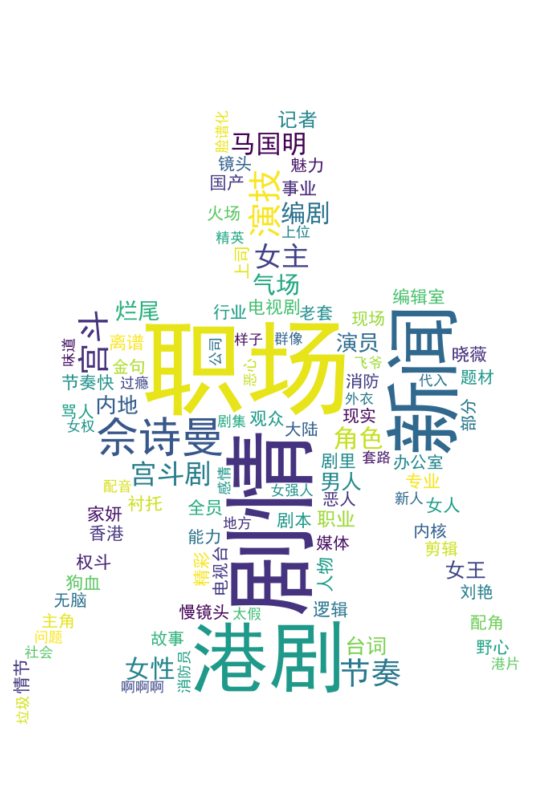

In [14]:
import jieba.analyse
from wordcloud import WordCloud
from imageio import imread
import matplotlib.pyplot as plt

# 从外部文件读取停用词列表
jieba.analyse.set_stop_words("stopwords.txt")

def generate_wordcloud(text):
    # Using jieba.analyse.extract_tags to extract keywords
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))

    # Building a dictionary of keywords and weights
    keywords_dict = {word: weight for word, weight in keywords}

    # Creating the word cloud
    wordcloud = WordCloud(
        mask=imread("新闻女王_抠图.jpg"),
        background_color="white",
        max_words=100,
        collocations=False,
        font_path=r'C:\Windows\Fonts\simhei.ttf',
    ).generate_from_frequencies(keywords_dict)

    # Display the word cloud image
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(all_comments_text)


# 情感分析

In [39]:
# 添加一列来存储情感分析的结果（使用SnowNLP）
df['sentiment'] = df['comments_segmented'].apply(lambda x: SnowNLP(x).sentiments)

In [40]:
# 打印带有情感分析结果的 DataFrame
print(df[['comments_segmented', 'sentiment']])


                                     comments_segmented  sentiment
0     太 浮夸 + 全程 装 b + 剧本 太假 。 新闻记者 比 消防 警察 还 早到 现场 ？...   0.015821
1     笑 死 了 ， 小混混 无理取闹 还 抢 司机 方向盘 是 直接 导致 事故 发生 的 原因...   0.000302
2     被 评论 骗 进去 了   看 了 之后 发现自己 也 有 马失前蹄 的 时候   港剧 画...   0.997078
3     冲着 马明同 阿 佘去 的 ， 结果 大失所望 。 阿 佘 真的 不 适合 这个 角色 ， ...   0.993082
4     绷 不住 了 ， 全程 自带 装 b 光环 ➕ 油腻 表情 ， 慢镜头 这么 多 ， 平时 ...   0.075909
...                                                 ...        ...
1795                        有点 脱离实际 ， 真实 的 新闻 世界 是 这样 么   0.989967
1796                         这么久 了 ， TVB 的 实力 终于 回来 了 。   0.844097
1797  诈骗 式 营销 哈哈哈 哈哈 ， 我 还 以为 多 好看 ， 开头 就 给 我 看 傻 了 ...   0.999836
1798             剧情 有 很多 逻辑 bug ， 为了 爽 有些 太 抓 马 了 。 。 。   0.897599
1799                                       还 不错 ， 后面 看看   0.883015

[1800 rows x 2 columns]


In [41]:
#导出数据看看
df.to_excel("df_sentiment.xlsx")

## 来看看情感分析效果如何

In [42]:
df.groupby("ratings").sentiment.mean()

ratings
1    0.590736
2    0.682305
3    0.755353
4    0.844787
5    0.821564
Name: sentiment, dtype: float64

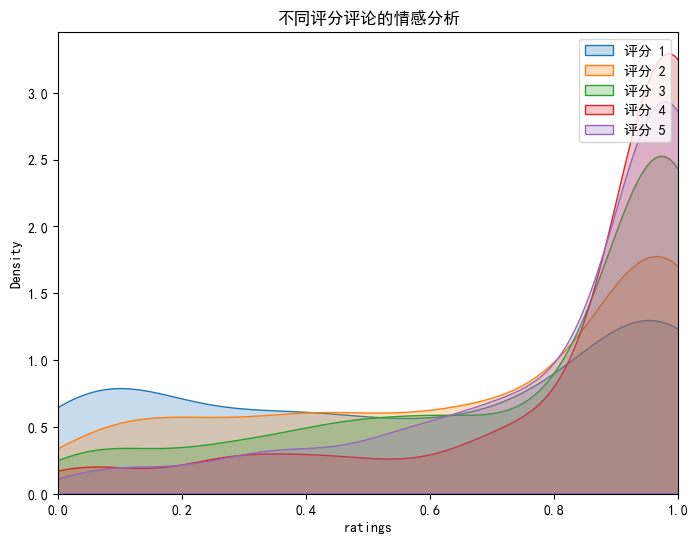

In [43]:

# 使用groupby对数据进行分组
grouped = df.groupby('ratings')

# 创建一个绘图区域
plt.figure(figsize=(8, 6))

# 遍历分组并绘制核密度图
for name, group in grouped:
    sns.kdeplot(group['sentiment'], label=f'评分 {name}', shade=True, common_norm=True)

# 设置 x 轴的限制
plt.xlim(0, 1)

# 添加图例和标签
plt.legend()
plt.title('不同评分评论的情感分析')
plt.xlabel('ratings')
plt.ylabel('Density')

# 显示图形
plt.show()
